In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Load Processed Data ---
PROCESSED_FILE = '../data/processed/parking_predictions_processed.parquet' # Adjust path if needed

print(f"Loading processed data from: {PROCESSED_FILE}")
try:
    df = pd.read_parquet(PROCESSED_FILE)
    print(f"Data loaded successfully. Shape: {df.shape}")
except FileNotFoundError:
    print(f"ERROR: Processed file not found at {PROCESSED_FILE}. Please ensure the processing notebook was run.")
    # Exit or handle error appropriately
    exit()
except Exception as e:
    print(f"ERROR loading Parquet file: {e}")
    exit()


Loading processed data from: ../data/processed/parking_predictions_processed.parquet
Data loaded successfully. Shape: (1837728, 3)


In [2]:
# --- 2. Analyze Overall Prediction Distribution ---

print("\n--- Prediction Code Distribution Analysis ---")

# Calculate value counts and proportions
counts = df['prediction'].value_counts().sort_index()
proportions = df['prediction'].value_counts(normalize=True).sort_index()

print("\nCounts:")
print(counts)
print("\nProportions:")
print(proportions)


--- Prediction Code Distribution Analysis ---

Counts:
prediction
0    1802016
1       2112
2       1503
3      32097
Name: count, dtype: Int64

Proportions:
prediction
0    0.980567
1    0.001149
2    0.000818
3    0.017466
Name: proportion, dtype: Float64


/var/folders/8t/1rzjlj6n3rj3v08skl2pwjbm0000gn/T/ipykernel_8382/2080539294.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=proportions.index, y=proportions.values, palette='viridis')


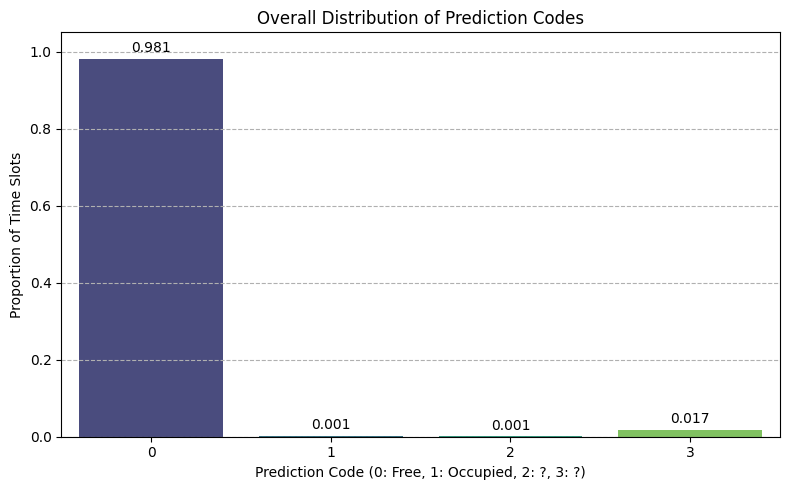

In [3]:
# --- 3. Visualize Distribution ---

plt.figure(figsize=(8, 5))
# Use proportions for the bar height, use counts index for labels
sns.barplot(x=proportions.index, y=proportions.values, palette='viridis')

# Add text labels for proportions on top of bars
for index, value in enumerate(proportions):
    plt.text(index, value + 0.01, f'{value:.3f}', ha='center', va='bottom') # Adjust position slightly

plt.title('Overall Distribution of Prediction Codes')
plt.xlabel('Prediction Code (0: Free, 1: Occupied, 2: ?, 3: ?)')
plt.ylabel('Proportion of Time Slots')
plt.ylim(0, 1.05) # Ensure space for text labels above the highest bar (likely 0)
plt.xticks(ticks=proportions.index) # Ensure all codes are shown as ticks
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

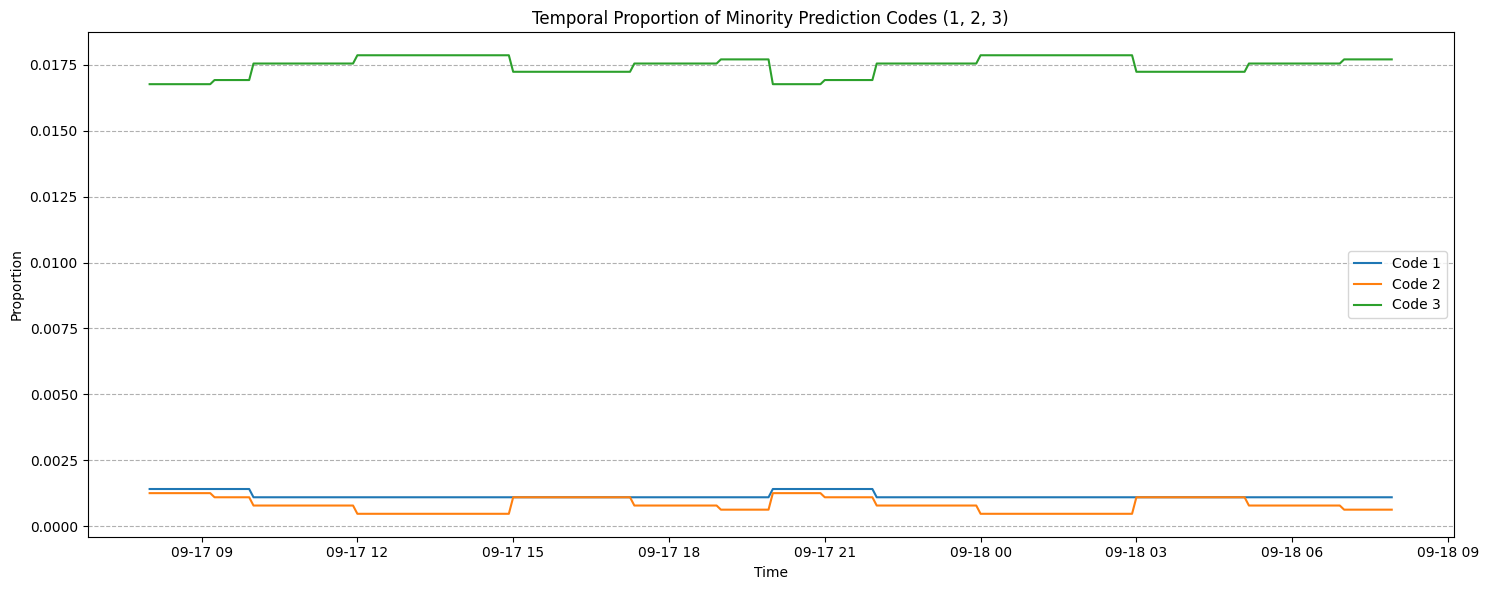

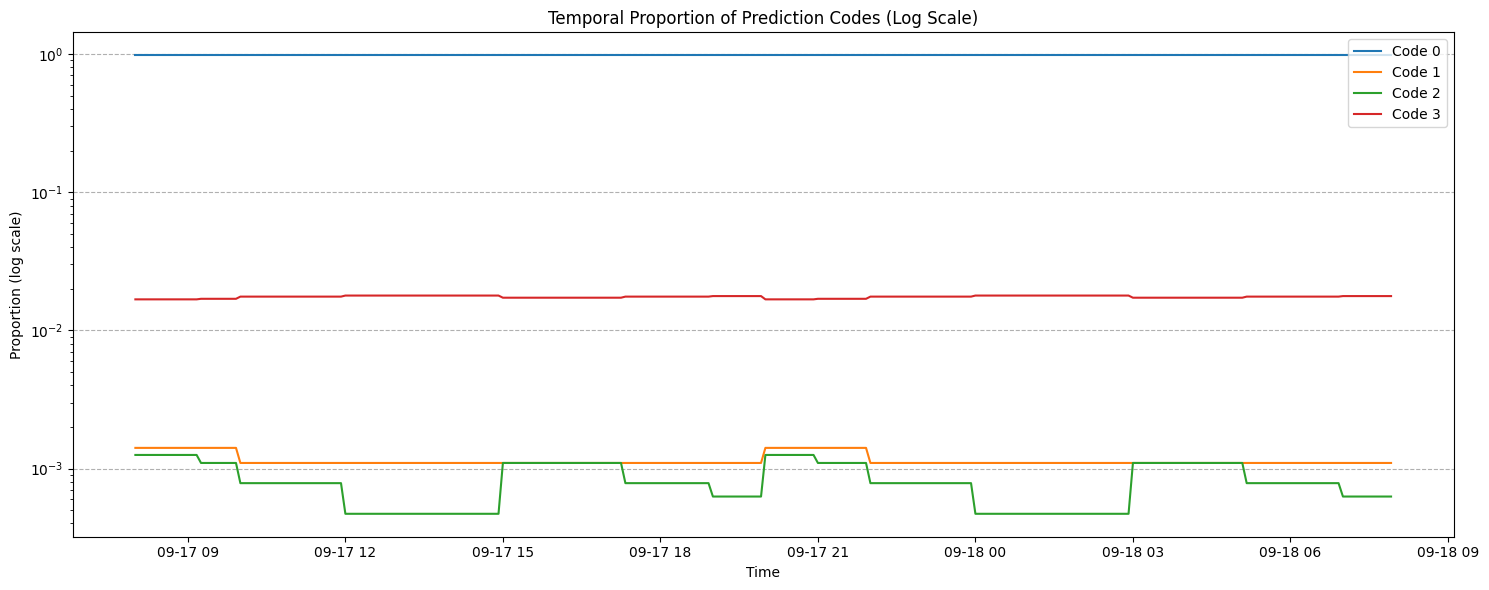

In [5]:
# --- 4. Analyze Temporal Distribution of Minority Prediction Codes ---
import matplotlib.pyplot as plt

# Only plot codes 1, 2, 3 (minority classes)
minority_codes = [1, 2, 3]
plt.figure(figsize=(15, 6))
for code in minority_codes:
    plt.plot(temporal_dist.index, temporal_dist[code], label=f'Code {code}')

plt.title('Temporal Proportion of Minority Prediction Codes (1, 2, 3)')
plt.xlabel('Time')
plt.ylabel('Proportion')
plt.legend()
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

# --- 5. Log-Scale Plot for All Codes ---
plt.figure(figsize=(15, 6))
for code in temporal_dist.columns:
    plt.plot(temporal_dist.index, temporal_dist[code], label=f'Code {code}')
plt.yscale('log')
plt.title('Temporal Proportion of Prediction Codes (Log Scale)')
plt.xlabel('Time')
plt.ylabel('Proportion (log scale)')
plt.legend()
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


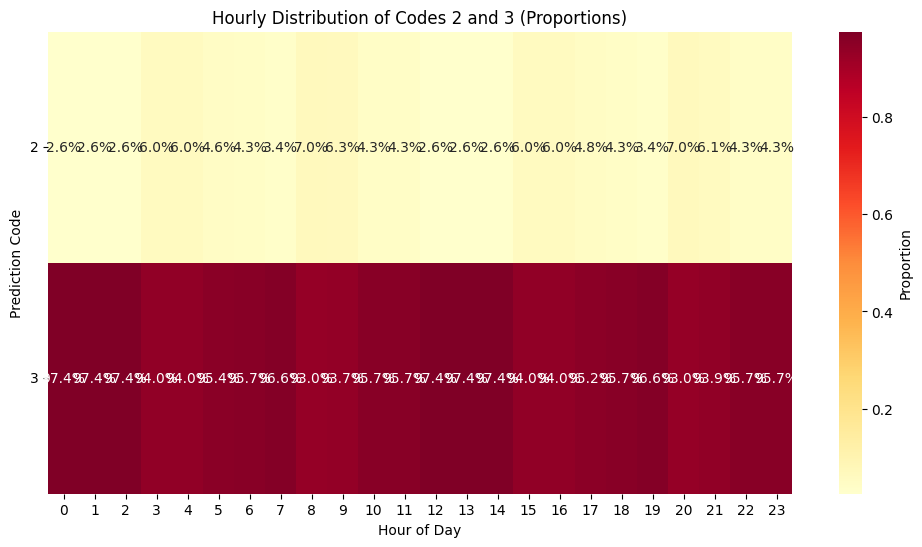

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter and prepare data
codes_2_3 = df[df['prediction'].isin([2,3])].copy()
codes_2_3['hour'] = codes_2_3['timestamp'].dt.hour

# Calculate proportions
hourly_dist = codes_2_3.groupby(['hour', 'prediction']).size().unstack(fill_value=0)
hourly_dist = hourly_dist.div(hourly_dist.sum(axis=1), axis=0)  # Normalize to proportions

# Plot
plt.figure(figsize=(12,6))
sns.heatmap(hourly_dist.T, annot=True, fmt=".1%", cmap="YlOrRd", cbar_kws={'label':'Proportion'})
plt.title("Hourly Distribution of Codes 2 and 3 (Proportions)")
plt.xlabel("Hour of Day")
plt.ylabel("Prediction Code")
plt.yticks(rotation=0)
plt.show()

In [8]:
# Calculate code frequency per section
section_stats = (
    df.groupby('ID_TRAMO')['prediction']
    .agg([('total', 'count'), 
          ('code2', lambda x: (x == 2).sum()), 
          ('code3', lambda x: (x == 3).sum())])
    .assign(
        code2_pct=lambda x: x.code2 / x.total,
        code3_pct=lambda x: x.code3 / x.total
    )
)

# Top sections with codes 2/3
print("Sections with highest code 2 frequency:")
print(section_stats.sort_values('code2_pct', ascending=False).head(5))

print("\nSections with highest code 3 frequency:")
print(section_stats.sort_values('code3_pct', ascending=False).head(5))

Sections with highest code 2 frequency:
          total  code2  code3  code2_pct  code3_pct
ID_TRAMO                                           
8017        288    264     24   0.916667   0.083333
3995        288    264     24   0.916667   0.083333
7872        288    264     24   0.916667   0.083333
5001        288    174    114   0.604167   0.395833
1450        288    174    114   0.604167   0.395833

Sections with highest code 3 frequency:
          total  code2  code3  code2_pct  code3_pct
ID_TRAMO                                           
1232        288      0    288        0.0        1.0
1080        288      0    288        0.0        1.0
956         288      0    288        0.0        1.0
961         288      0    288        0.0        1.0
1421        288      0    288        0.0        1.0
